MovieWriter ffmpeg unavailable; using Pillow instead.


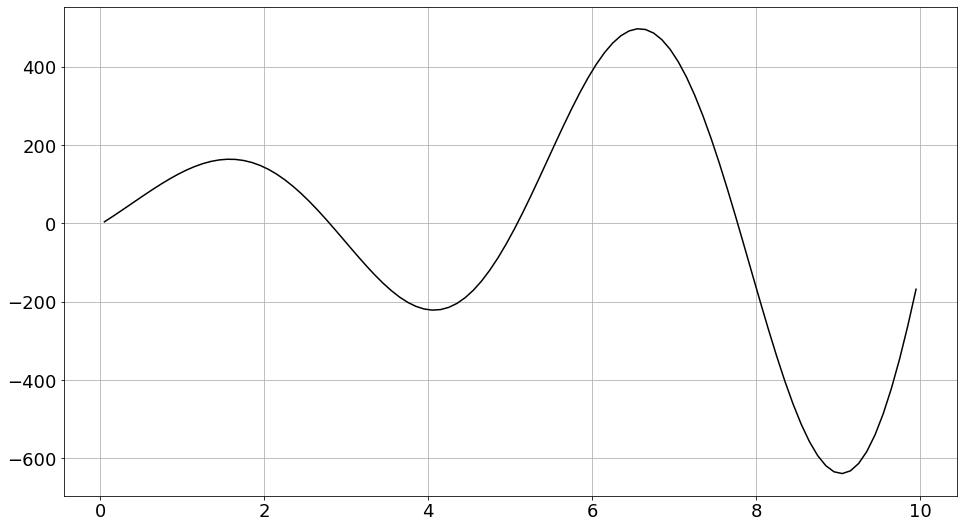

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
from celluloid import Camera
import glob

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)
camera = Camera(fig)


def loadData(name) :
    file = open(name, 'r')

    x = np.array([])
    u = np.array([])
    
    for line in file :
        x = np.append(x, float(line.split()[0]))
        u = np.append(u, float(line.split()[1]))
        
    return x, u


filenames = glob.glob('out/*.dat')
for name in filenames : 
    x, u = loadData(name)
    plt.plot(x, u, color = 'black')
    camera.snap()

xax = ax.xaxis
xlocs = xax.get_ticklocs()
xlabels = xax.get_ticklabels()
xlines = xax.get_ticklines()

xax.grid(True)

for label in xlabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)
    
yax = ax.yaxis
ylocs = yax.get_ticklocs()
ylabels = yax.get_ticklabels()
ylines = yax.get_ticklines()
yax.grid(True)

for label in ylabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)

animation = camera.animate()
animation.save('results.gif', fps = 30)